# Activity: Build an XGBoost model

## Introduction

In this activity, you’ll build on the skills and techniques you learned in the decision tree and random forest lessons to construct your own XGBoost classification model. The XGBoost model is a very powerful extension of decision trees, so having a strong working familiarity with this process will strengthen your skills and resume as a data professional.

This activity is a continuation of the airlines project in which you built decision tree and random forest models. You will use the same data, but this time you will train, tune, and evaluate an XGBoost model. You’ll then compare the performance of all three models and decide which model is best. Finally, you’ll explore the feature importances of your model and identify the features that most contribute to customer satisfaction.


## Step 1: Imports

### Import packages

Begin with your import statements. First, import `pandas`, `numpy`, and `matplotlib` for data preparation. Next, import scikit-learn (`sklearn`) for model preparation and evaluation. Then, import `xgboost`, which provides the classification algorithm you'll implement to formulate your predictive model.

In [1]:
# Import relevant libraries and modules.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
import pickle

### Load the dataset

To formulate your model, `pandas` is used to import a csv of airline passenger satisfaction data called `Invistico_Airline.csv`. This DataFrame is called `airline_data`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

### YOUR CODE HERE ###

airline_data = pd.read_csv('Invistico_Airline.csv', error_bad_lines=False)

### Display the data

Examine the first 10 rows of data to familiarize yourself with the dataset.

In [3]:
# Display the first ten rows of data.

airline_data.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


### Display the data type for each column

Next, observe the types of data present within this dataset.

In [4]:
# Display the data type for each column in your DataFrame.

airline_data.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Recall the methods for exploring DataFrames.
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Recall a property of a `pandas` DataFrame that allows you to view the data type for each column.</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call `.dtypes` on your DataFrame `airline_data` to view the data type of each column.</details>

**Question:** Identify the target (or predicted) variable for passenger satisfaction. What is your initial hypothesis about which variables will be valuable in predicting satisfaction?

The variable "satisfaction" will be the most suitable one as target.

## Step 2: Model preparation

Before you proceed with modeling, consider which metrics you will ultimately want to leverage to evaluate your model.

**Question:** Which metrics are most suited to evaluating this type of model?

F1 should be the most suitable metric, since it is the harmonic mean of both precision and recall.

### Prepare your data for predictions

You may have noticed when previewing your data that there are several non-numerical variables (`object` data types) within the dataset.

To prepare this DataFrame for modeling, first convert these variables into a numerical format.

In [5]:
# Convert the object predictor variables to numerical dummies.

airline_data_dummies = pd.get_dummies(airline_data, columns=['satisfaction','Customer Type','Type of Travel','Class'])
airline_data_dummies.head()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Arrival Delay in Minutes,satisfaction_dissatisfied,satisfaction_satisfied,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,65,265,0,0,0,2,2,4,2,3,...,0.0,0,1,1,0,0,1,0,1,0
1,47,2464,0,0,0,3,0,2,2,3,...,305.0,0,1,1,0,0,1,1,0,0
2,15,2138,0,0,0,3,2,0,2,2,...,0.0,0,1,1,0,0,1,0,1,0
3,60,623,0,0,0,3,3,4,3,1,...,0.0,0,1,1,0,0,1,0,1,0
4,70,354,0,0,0,3,4,3,4,2,...,0.0,0,1,1,0,0,1,0,1,0


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about feature engineering](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/5mEqu/introduction-to-feature-engineering).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `pandas` function for transforming categorical data into "dummy" variables.</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use the `get_dummies()` function on your DataFrame `airline_data` to create dummies for the categorical variables in your dataset. Note that your target variable will also need this treatment.</details>

### Isolate your target and predictor variables
Separately define the target variable (`satisfaction`) and the features.

In [6]:
# Define the y (target) variable.

y = airline_data_dummies['satisfaction_satisfied']

# Define the X (predictor) variables.

X = airline_data_dummies.copy()
X = X.drop(['satisfaction_satisfied', 'satisfaction_dissatisfied'], axis=1)

In [7]:
airline_data_dummies.shape

(129880, 27)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about splitting your data into x and y](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/ozK9K/build-a-decision-tree-with-python).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

In `pandas`, use square brackets `[]` to subset your DataFrame by specifying which column(s) to select. Also, quickly subset a DataFrame to exclude a particular column by using the `drop()` function and specifying the column to drop.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

In this case, your target variable was split into two columns from the dummy split. Be sure to include only the column which assigns a positive (i.e., "satisfied") outcome as 1.
</details>

### Divide your data 

Divide your data into a training set (75% of the data) and test set (25% of the data). This is an important step in the process, as it allows you to reserve a part of the data that the model has not used to test how well the model generalizes (or performs) on new data.

In [8]:
# Perform the split operation on your data.
# Assign the outputs as follows: X_train, X_test, y_train, y_test.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about splitting your data between a training and test set](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/ozK9K/build-a-decision-tree-with-python).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

To perform the splitting, call the function in the `model_selection` module of `sklearn` on the features and target variable.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call the `train_test_split()` function, passing in both `features` and `target`, while configuring the appropriate `test_size`. Assign the output of this split as `X_train`, `X_test`, `y_train`, `y_test`.
</details>

## Step 3: Model building

### "Instantiate" your XGBClassifer

Before you fit your model to your airline dataset, first create the XGB Classifier model and define its objective. You'll use this model to fit and score different hyperparameters during the GridSearch cross-validation process.

In [9]:
# Define xgb to be your XGBClassifier.

xgb = XGBClassifier(objective='binary:logistic', random_state=42)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about constructing a classifier model from `xgboost`](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/njRAP/build-an-xgboost-model-with-python).</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Note that the target variable in this case is a binary variable. </details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use the `XGBClassifier()` from `xgboost`. Set the objective as `binary:logistic`.
</details>

### Define the parameters for hyperparameter tuning

To identify suitable parameters for your `xgboost` model, first define the parameters for hyperparameter tuning. Specifically, define a range of values for `max_depth`, `min_child_weight`, `learning_rate`, `n_estimators`, `subsample`, and `colsample_bytree`.

Consider a more limited range for each parameter to allow for timely iteration and model training.

In [10]:
# Define parameters for tuning as `cv_params`.

cv_params = {'max_depth': [4,6], 
             'min_child_weight': [3,5],
             'learning_rate': [0.1, 0.2, 0.3],
             'n_estimators': [10, 20],
             'subsample': [0.25, 0.5],
             'colsample_bytree': [0.25, 0.5],
             } 

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about hyperparameter tuning using GridSearch cross-validation](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/afopk/tune-a-decision-tree).</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Consider a range of values for each parameter, similar to what you observed in the lesson. </details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Define these parameters using a Python dictionary in the following format: `{'parameter1': [range,of,values]}`</details>

**Question:** What is the likely effect of adding more estimators to your GridSearch?

It will increase the experience curve of the final model as each added estimator will contribute to the learning process of the subsequent base learner.

### Define how the models will be evaluated

Define how the models will be evaluated for hyperparameter tuning. To yield the best understanding of model performance, utilize a suite of metrics.

In [11]:
# Define your criteria as `scoring`.

scoring = {'accuracy', 'precision', 'recall', 'f1'}

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Recall what you've learned about [using metric evaluation](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/afopk/tune-a-decision-tree) to determine the metrics you include.</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Consider what you've learned about the limitations of only including a single metric, such as `accuracy`. </details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Define metrics which balance the false positives and false negatives in binary classification problems.

### Construct the GridSearch cross-validation 

Construct the GridSearch cross-validation using the model, parameters, and scoring metrics you defined. Additionally, define the number of folds and specify *which metric* from above will guide the refit strategy.

In [12]:
# Construct your GridSearch.

xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='f1')

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Recall what you've learned about constructing a GridSearch for [cross-validation](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/W4vAW/verify-performance-using-validation).</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Balance the time spent on validation with the number of folds you choose. </details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Choose the refit method which simultaneously balances false positives and false negatives.

### Fit the GridSearch model to your training data

If your GridSearch takes too long, revisit the parameter ranges above and consider narrowing the range and reducing the number of estimators.

**Note:** The following cell might take several minutes to run.

In [13]:
%%time
# fit the GridSearch model to training data

xgb_cv.fit(X_train, y_train)

CPU times: user 9min 2s, sys: 914 ms, total: 9min 2s
Wall time: 4min 41s


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     predictor=None, random_state=42,
                                     reg_alpha=None, ...),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.25, 0.5],
                         'learning_rate': [0.1, 0.2,

In [14]:
xgb_cv.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.3,
 'max_depth': 6,
 'min_child_weight': 3,
 'n_estimators': 20,
 'subsample': 0.5}

**Question:** Which optimal set of parameters did the GridSearch yield?

{'colsample_bytree': 0.5,
 'learning_rate': 0.3,
 'max_depth': 8,
 'min_child_weight': 1,
 'n_estimators': 50,
 'subsample': 0.5}

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Recall what you've learned about the result of the GridSearch.</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Once you've fitted the GridSearch model to your training data, there will be an attribute to access which yields to the optimal parameter set.</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Access the `best_params_` attribute from your fitted model. </details>

### Save your model for reference using `pickle`

Use the `pickle` library you've already imported to save the output of this model.

In [15]:
# Use `pickle` to save the trained model.

path = '/home/jovyan/work/'
with open(path + 'xgb_cv_model.pickle', 'wb') as to_write:
    pickle.dump(xgb_cv, to_write) 

In [16]:
with open(path+'xgb_cv_model.pickle', 'rb') as to_read:
    xgb_cv = pickle.load(to_read)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about "pickling" prior models](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/FSnam/build-and-validate-a-random-forest-model-using-a-validation-data-set).</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The model to be pickled is the fitted GridSearch model from above. </details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call `pickle.dump()`, reference the fitted GridSearch model, and provide a name for the pickle file.

## Step 4: Results and evaluation

### Formulate predictions on your test set

To evaluate the predictions yielded from your model, leverage a series of metrics and evaluation techniques from scikit-learn by examining the actual observed values in the test set relative to your model's prediction.

First, use your trained model to formulate predictions on your test set.

In [17]:
# Apply your model to predict on your test data. Call this output "y_pred".

y_pred = xgb_cv.predict(X_test)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Recall what you've learned about creating predictions from trained models.</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the fitted GridSearch model from your training set and predict the predictor variables you reserved in the train-test split.</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call `predict()` on your fitted model and reference `X_test` to create these predictions.
</details>

### Leverage metrics to evaluate your model's performance

Apply a series of metrics from scikit-learn to assess your model. Specifically, print the accuracy score, precision score, recall score, and f1 score associated with your test data and predicted values.

In [39]:
# 1. Print your accuracy score.

accuracy = accuracy_score(y_test, y_pred)
print("The Accuracy score is:", round(accuracy,3))

# 2. Print your precision score.

precision = precision_score(y_test, y_pred)
      
print("The Precision score is:", round(precision,3))

# 3. Print your recall score.

recall = recall_score(y_test, y_pred)
print("The Recall score is:", round(recall,3))

# 4. Print your f1 score.

f1 = f1_score(y_test, y_pred)
print("The F1 score is:", round(f1,3))

The Accuracy score is: 0.932
The Precision score is: 0.942
The Recall score is: 0.933
The F1 score is: 0.937


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about model evaluation for detail on these metrics](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/njRAP/build-an-xgboost-model-with-python).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the function in the `metrics` module in `sklearn` to compute each of these metrics.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call `accuracy_score()`, `precision_score()`, `recall_score()`, and `f1_score()`, passing `y_test` and `y_pred` into each.
</details>

**Question:** How should you interpret your accuracy score?

It is the ratio of correctly predicted observations to total observations. The accuracy is 93.2%, meaning that the model was able to make accurate predictions of TPs and TNs with 93.2% of total predictions. The model was able to capture 93.2% of satisfied and dissatisfied customers.

**Question:** Is your accuracy score alone sufficient to evaluate your model?

Other metrics such as Precision and F1 should also be taken into account when evaluating the model due to their significance.

**Question:** When observing the precision and recall scores of your model, how do you interpret these values, and is one more accurate than the other?

Precision is 94.2%, recall is 93.3%. Precision indicates that of all positive predictions made by the model, 94.2% were TP, which is a fairly good ratio to capture potential satisfied customers. On the otherhand, of all real positive cases, 93.3% were predicted as positive by the model. F1 (93.7% in here) would be better than both measures since it combines the two together. The accuracy of either measure depends on the situation and the nature of the target variable that needs to be predicted.

**Question:** What does your model's F1 score tell you, beyond what the other metrics provide?*

The F1 balances between precision and recall, therefore in this model it lies in between both of them. It should reflect more balanced view of satisfied customers accurately predicted by the model.

### Gain clarity with the confusion matrix

Recall that a **confusion matrix** is a graphic that shows a model's true and false positives and true and false negatives. It helps to create a visual representation of the components feeding into the metrics above.

Create a confusion matrix based on your predicted values for the test set.

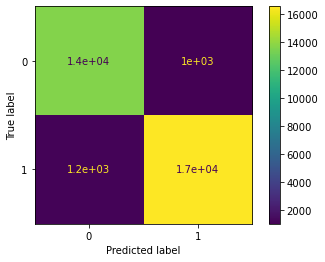

In [19]:
# Construct and display your confusion matrix.

# Construct the confusion matrix for your predicted and test values.

import sklearn.metrics as metrics
cm = metrics.confusion_matrix(y_test, y_pred, labels = xgb_cv.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = xgb_cv.classes_)
disp.plot();

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about model evaluation](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/njRAP/build-an-xgboost-model-with-python).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the functions in the `metrics` module to create a confusion matrix.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call `confusion_matrix`, passing in `y_test` and `y_pred`. Next, utilize `ConfusionMatrixDisplay()` to display your confusion matrix.
</details>

**Question:** When observing your confusion matrix, what do you notice? Does this correlate to any of your other calculations?

According to the matrix, the model was able to accurately capture 14,000 dissatisfied customers (TN) and 170 satisfied customers (TP). The matrix also misclassified 1000 customers as satisfied (FP), meaning that they could slip away unnoticed from the company due to this misclassification, and misclassified 1200 customers as dissatisfied (FN) which could in turn lead the company to spend more resources on them attempting to incentivise them to continue using the company's services of flying, while they don't need such incentives at the first place, which could instead be allocated to truely dissatisfied customers who have higher probability of churn. Nevertheless, the figure 14,000 is fairly good for a model and should be an eye-opener for the company to devise suitable plans for this class of customers.

### Visualize most important features

`xgboost` has a built-in function to visualize the relative importance of the features in the model using `matplotlib`. Output and examine the feature importance of your model.

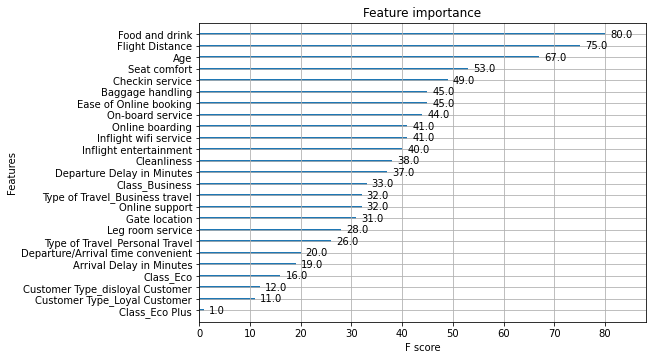

In [20]:
# Plot the relative feature importance of the predictor variables in your model.

from xgboost import plot_importance
plt.rcParams["figure.figsize"] = (8,5.5)
plot_importance(booster=xgb_cv.best_estimator_);

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Recall the attributes that are provided once the model is fitted to training data.</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Examine the `best_estimator_` attribute of your fitted model.</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

To easily visualize feature importance, call the built-in `plot_importance` function `xgboost` offers on the `best_estimator_`.</details>

**Question:** Examine the feature importances outputted above. What is your assessment of the result? Did anything surprise you?

According to the plot, food and drink, age, and flight distance are the most important predictors with regard to customer satisfaction. that means the three factors are worhty of further studies as to how these variables affect customer satisfaction and how accordingly can policies and strategies be formulated by the company to increase satisfaction and decrease dissatisfaction among customers in order to increase customer retention.

### Compare models

Create a table of results to compare model performance.

In [40]:
# Create a table of results to compare model performance.

table = pd.DataFrame()
table = table.append({'Model': "Tuned Decision Tree",
                        'F1':  0.94362,
                        'Recall': 0.935723,
                        'Precision': 0.951658,
                        'Accuracy': 0.938794
                      },
                        ignore_index=True
                    )

table = table.append({'Model': "Tuned Random Forest",
                        'F1':  0.958077,
                        'Recall': 0.950454,
                        'Precision': 0.965824,
                        'Accuracy': 0.954467
                      },
                        ignore_index=True
                    )

table = table.append({'Model': "Tuned XGBoost",
                        'F1':  f1,
                        'Recall': recall,
                        'Precision': precision,
                        'Accuracy': accuracy
                      },
                        ignore_index=True
                    )

table

,Model,F1,Recall,Precision,Accuracy
0,Tuned Decision Tree,0.943620,0.935723,0.951658,0.938794
1,Tuned Random Forest,0.958077,0.950454,0.965824,0.954467
2,Tuned XGBoost,0.937341,0.932647,0.942083,0.931752


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Create a DataFrame and use the `append()` function to add the results of each model as a new row.

</details>

**Question:** How does this model compare to the decision tree and random forest models you built in previous labs? 

According to the table above, the Tuned Random Forest model is the best in terms of performance and prediction.

## Considerations

**What are some key takeaways you learned from this lab?**

[Write your response here. Double-click (or enter) to edit.]

**How would you share your findings with your team?**

- The XGBoost model was designed with the following parameters: 'max_depth':[4,6], 'min_child_weight':[3,5], 'learning_rate':[0.1, 0.2, 0.3], 'n_estimators': [10, 20], 'subsample': [0.25, 0.5], 'colsample_bytree': [0.25, 0.5], out of which, after fitting the model, best parameters were found to be: 'colsample_bytree': 0.5, 'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 3, 'n_estimators': 20, 'subsample': 0.5.
- The four metric scores of the model were as follows: Accuracy: 93.2%, Precision: 94.2%, Recall: 93.3%, and F1: 93.7%.
- According to the confusion matrix desgined, the model was able to accurately capture 14,000 dissatisfied customers (TN) and 170 satisfied customers (TP). The model however misclassified 1000 customers as satisfied (FP), meaning that they could slip away unnoticed from the company due to this misclassification, and misclassified 1200 customers as dissatisfied (FN) which could in turn lead the company to spend more resources on them attempting to incentivise them to continue using the company's services of flying, while they don't need such incentives at the first place, which could instead be allocated to truely dissatisfied customers who have higher probability of churn. Nevertheless, the figure 14,000 is fairly good for a model and should be an eye-opener for the company to devise suitable plans for this class of customers.
- The model showed that food and drink, age, and flight distance are the most important predictors with regard to customer satisfaction. that means the three factors are worhty of further studies as to how these variables affect customer satisfaction and how accordingly can policies and strategies be formulated by the company to increase satisfaction and decrease dissatisfaction among customers in order to increase customer retention.
- Out of the tuned Decision Tree, Random Forest, and XGBoost models designed for this sutdy, the Random Forest seemed to be the best performing among all of the three.

**What would you share with and recommend to stakeholders?**

- An XGBoost model was designed to study the variables that affect and predict customer satisfaction the most. It performed fairly good especially compared to previous models designed for the same project.
- The model showed that food and drink, age, and flight distance are the most important predictors with regard to customer satisfaction. that means the three factors are worhty of further studies as to how these variables affect customer satisfaction and how accordingly can policies and strategies be formulated by the company to increase satisfaction and decrease dissatisfaction among customers in order to increase customer retention.
- The model was able to accurately capture 14,000 dissatisfied customers and 170 satisfied customers. The model however misclassified 1000 customers as satisfied, meaning that they could slip away unnoticed from the company due to this misclassification, and misclassified 1200 customers as dissatisfied, which could in turn lead the company to spend more resources on them attempting to incentivise them to continue using the company's services of flying, while they don't need such incentives at the first place, which could instead be allocated to truely dissatisfied customers who have higher probability of churn. Nevertheless, the figure 14,000 is fairly good for a model and should be an eye-opener for the company to devise suitable plans for this class of customers.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged